In [6]:
#from tifffile import imsave, imread
import os
import numpy as np


def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            image_path = os.path.join(img_dir, image_name)
            image = np.load(image_path)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [7]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [40]:
#Test the generator

from matplotlib import pyplot as plt
import random

train_img_dir = r"C:\Users\rahul\Documents\proxmedlpu\trainingdata\train\temp_images"
train_mask_dir = r"C:\Users\rahul\Documents\proxmedlpu\trainingdata\train\temp_mask"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 3

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

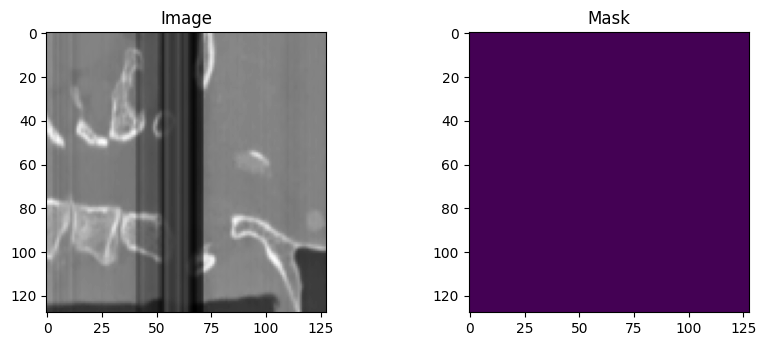

In [69]:
#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]


n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.imshow(test_img[n_slice], cmap='gray')
plt.title('Image')
plt.subplot(222)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()